# **A/B Testing:**

Statistical analysis is our best tool for predicting outcomes we don’t know, using the information we know.

Picture this scenario – You have made certain changes to your website recently. Unfortunately, you have no way of knowing with full accuracy how the next 100,000 people who visit your website will behave. That is the information we cannot know today, and if we were to wait until those 100,000 people visited our site, it would be too late to optimize their experience.

This seems to be a classic Catch-22 situation!

This is where a data scientist can take control. A data scientist collects and studies the data available to help optimize the website for a better consumer experience. And for this, it is imperative to know how to use various statistical tools, especially the concept of A/B Testing.



# **What is A/B Testing**

A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.

For instance, let’s say you own a company and want to increase the sales of your product. Here, either you can use random experiments, or you can apply scientific and statistical methods. A/B testing is one of the most prominent and widely used statistical tools.

In the above scenario, you may divide the products into two parts – A and B. Here A will remain unchanged while you make significant changes in B’s packaging. Now, on the basis of the response from customer groups who used A and B respectively, you try to decide which is performing better.

<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/ab_test.png" />
</p>

It is a hypothetical testing methodology for making decisions that estimate population parameters based on sample statistics. The population refers to all the customers buying your product, while the sample refers to the number of customers that participated in the test.

<br>

# **Project**

In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

# **AB Testing Process**

- Understanding business problem & data

- Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)

- Look summary stats and plots
- Apply hypothesis testing and check assumptions
- Check Normality & Homogeneity
- Apply tests 
- Evaluate the results
- Make inferences
- Recommend business decision to your customer/director/ceo etc.

# **Data Preprocessing**

In [1]:
import pandas as pd

data_train = pd.read_csv('/content/control_data.csv')
experiment_data = pd.read_csv('/content/experiment_data.csv')

Dataset Information

In [2]:
data_train.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [5]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


Checking the number of null values present in each column

In [6]:
data_train.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [7]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [8]:
data_train[data_train['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


In [11]:
data_total = pd.concat([data_train, experiment_data])
data_total.sample(5)

,Date,Pageviews,Clicks,Enrollments,Payments
16,"Mon, Oct 27",9535,759,233.0,124.0
33,"Thu, Nov 13",9717,814,NaN,NaN
13,"Fri, Oct 24",9434,673,220.0,122.0
10,"Tue, Oct 21",10660,867,196.0,105.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [12]:
import numpy as np
np.random.seed(7)
import sklearn.utils

data_total['row_id'] = data_total.index
# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)
# Remove missing data
data_total.dropna(inplace=True)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))
# Remove missing data
data_total.dropna(inplace=True)
del data_total['Date'], data_total['Payments']
data_total = sklearn.utils.shuffle(data_total)

Now Check the New data

In [13]:
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


Reordering Columns

In [14]:
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

Splitting the datasets into training sets and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.3)

Encoding Cateogrical Values

In [16]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [17]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9655,771,1
0,0,1,7716,686,2
4,4,1,9793,832,6
19,19,0,9308,728,4
2,2,1,10511,909,1


In [18]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

In [21]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [23]:
calculate_metrics(y_test, y_preds)

RMSE Score: 27.347446901626324
R2_Squared: 0.20804655497882052
MAE Score: 22.564171711466745


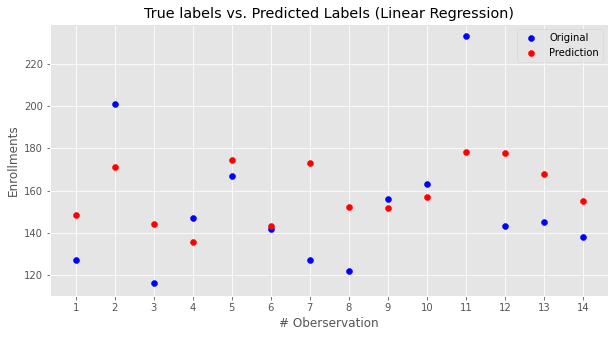

In [24]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [25]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              412.9
Date:                Sun, 19 Sep 2021   Prob (F-statistic):                    1.89e-24
Time:                        18:22:28   Log-Likelihood:                         -142.71
No. Observations:                  32   AIC:                                      293.4
Df Residuals:                      28   BIC:                                      299.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,3.728808e-07
2,Clicks,6.359197e-05
3,DOW,3.880337e-01
0,Experiment,8.737789e-01


# **Hypothesis Testing**

In hypothesis testing, we have to make two hypotheses i.e Null hypothesis and the alternative hypothesis. Let’s have a look at both.

- Null hypothesis or H0:
   The null hypothesis is the one that states that sample observations result purely from chance. From an A/B test perspective, the null hypothesis states that there is no difference between the control and variant groups. It states the default position to be tested or the situation as it is now, i.e. the status quo. Here our H0 is ” there is no difference in the conversion rate in customers receiving newsletter A and B”.

- Alternative Hypothesis or H0:
The alternative hypothesis challenges the null hypothesis and is basically a hypothesis that the researcher believes to be true. The alternative hypothesis is what you might hope that your A/B test will prove to be true.

## **Probability and Statistical Significances**


<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/p-value.png" />
</p>


To understand this, we must be familiar with a few terms:

- Significance level (alpha): The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true. Generally, we use the significance value of 0.05

- P-Value: It is the probability that the difference between the two values is just because of random chance. P-value is evidence against the null hypothesis. The smaller the p-value stronger the chances to reject the H0. For the significance level of 0.05, if the p-value is lesser than it hence we can reject the null hypothesis

- Confidence interval: The confidence interval is an observed range in which a given percentage of test outcomes fall. We manually select our desired confidence level at the beginning of our test. Generally, we take a 95% confidence interval
Next, we can calculate our t statistics using the below formula:


<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/test_sta.png" />
</p>

# **When Should We Use A/B Testing?**

A/B testing works best when testing incremental changes, such as UX changes, new features, ranking, and page load times. Here you may compare pre and post-modification results to decide whether the changes are working as desired or not.

A/B testing doesn’t work well when testing major changes, like new products, new branding, or completely new user experiences. In these cases, there may be effects that drive higher than normal engagement or emotional responses that may cause users to behave in a different manner.